# Previously on Assignment 1...

In the last assignment, an attempt of predictions have been made based on an open anime review/ratings dataset from kaggle.com. We have followed a seven step process to create a model and evaluated it according.

In short, we know that the Regression model is marginally ok in determining the ratings of a movie based on its genre etc. However, the classification model is bad at determining whether the movie is popular or not, and I suspect that this is because the column of popularity is created by yours truly and must be inaccurate. 

In this Assignment, an attempt of explaining the models more in depth will be made, along with some visualizations and recommendations of improving the prediction of ratings and popularity of an anime.

# Part 1: Regression model. 
We shall continue where we left off. Below is the code that was ran:

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# load the dataset "anime.csv"
dataset = pd.read_csv("~/codes/NN_Python/Dataset/anime.csv")

# Removing null and 'Unknown' datapoints
modified_dataset = dataset.dropna()
modified_dataset = modified_dataset[~modified_dataset.episodes.str.contains('Unknown')]

# Splitting the 'genre' column and type column
genres = modified_dataset['genre'].str.get_dummies(', ').astype(int)
types = modified_dataset['type'].str.get_dummies(', ').astype(int)

# Upon inspection the type had music as type, and music as genre. Rename column
types.columns = ['Movie', 'Music1', 'ONA', 'OVA', 'Special', 'TV']

print(modified_dataset)
# Combining to form inp variables
inp = genres.join(types)
# creating train test split
inp_train, inp_test, label_train, label_test = train_test_split(inp, 
            modified_dataset[['rating']], test_size = 0.1, random_state = 1509)

# Question 1: is the rating of the movie based on genre and type?
linear_model = LinearRegression().fit(inp_train,label_train)

# checking R^2 values of train dataset
print('The R-squared value of the model is %f' %(linear_model.score(inp_train, label_train)))

# checking R^2 values of test dataset
print('The R-squared value of the model is %f' %(linear_model.score(inp_test, label_test)))

# predict train dataset...
print(linear_model.predict(inp_train))
print(label_train.head(3))
print(label_train.tail(3))

# predict test dataset...
print(linear_model.predict(inp_test))
print(label_test.head(3))
print(label_test.tail(3))

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
5         32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6         11061                             Hunter x Hunter (2011)   
7           820                               Ginga Eiyuu Densetsu   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9         15417                           Gintama&#039;: Enchousen   
10         4181                               Clannad: After Story   
11        28851                                     Koe no Katachi   
12          918                                            Gintama   
13         2904     

In [2]:
# Using a different library
X_raw = sm.add_constant(inp_train.astype(float))
Y_raw = label_train.astype(int)
est_original = sm.OLS(Y_raw, X_raw)
est2_original = est_original.fit()
print(est2_original.summary())

# dropping columns that are irrelevant, high p values means there is no correlation between the input and output.
inp_train_modified = inp_train.drop(columns=['Cars','Demons', 'Ecchi', 'Harem', 'Magic', 'Martial Arts', 'Mecha', 'Music', 'Samurai', 'Shoujo Ai', 'Space', 'Vampire', 'Yaoi', 'Yuri', 'Shounen Ai'])
inp_test_modified = inp_test.drop(columns=['Cars','Demons', 'Ecchi', 'Harem', 'Magic', 'Martial Arts', 'Mecha', 'Music', 'Samurai', 'Shoujo Ai', 'Space', 'Vampire', 'Yaoi', 'Yuri', 'Shounen Ai'])

# Refit model: see how it fares
X = sm.add_constant(inp_train_modified.astype(float))
Y = label_train.astype(int)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     92.38
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                -13835.
No. Observations:               10647   AIC:                         2.777e+04
Df Residuals:                   10598   BIC:                         2.812e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5655      0.021    219.268

/home/spdpnd98/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In the previous segment, we talked only about `R squared` values. However, this doesn't really help explain as much. We then used a different library to perform linear regression, and showed the `p values` for each variable, then stopped at removing the input variables. This time, we shall explore more evaluation metrics and explain why we chose these, and hopefully further improve the model, then test it against the previous results based on actual accuracy.

The accurarcy of the `Regression algorithm` uses the `kfold` method:

In [3]:
from sklearn.model_selection import KFold

r2 = 'r2'
MAE = 'neg_mean_absolute_error'
MSE = 'neg_mean_squared_error'

# kfold method
kfold = KFold(n_splits = 10, random_state = 1509, shuffle = True)

In [4]:
# obtaining the cross validation result with train dataset
result = model_selection.cross_val_score(linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model (train data): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

R squared of Regression model (train data): 0.317437, the standard deviation is: 0.019048


From the above observation, since the `R^2` values are less than 0.5, the model can only explain less than half of the variation of the model. the other `68%` of variation still remains unexplained.

Now, let us check with the `test set` and see the results

In [5]:
# obtaining the cross validation result with test dataset
result = model_selection.cross_val_score(linear_model, inp_test, label_test.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model (test data): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

R squared of Regression model (test data): 0.279251, the standard deviation is: 0.076956


As compared with the train set results, we can see the model does not really explain the dataset well. more than `70%` of the variation is not being explained well.

Furthermore, there is too much change in the test set's R^2 values.

## Analysis

We need to address why the train set yielded such low `R^2` values and why the test set has even lower `R^2` values.  

In cases of a model that is <i> underfitted</i>, a low `R^2` value in the `train set` is observed. There maybe too much variables and the model even after trying to make distinctions, is still overgeneralizing the input data, meaning that there may be more phenomenas that the model cannot capture and we may need more data to accurately capture these variations.

However, for a model that is <i>overfitted</i>, an `R^2` value in the `test set` deviating too much from the `train set` will be observed. This is caused by the dataset capturing too much information during the training step, causing it to make too much distinctions from the input variables.

Wait, this seems weird doesn't it? Is the model `underfitted` and `overfitted` at the same time? This cannot be logical right?

In order to explain this weird phenomena, we have to remember this assumption:
- The `ratings` is predicted from `categorical data` expanded to `dummy variables`, whereby if the category exists, a 1 is assigned to it.

After some careful thought, I have found it difficult to visualize a line/disc of some sort over an n-dimensional input data. Multiple points only considering only one variable can have multiple ratings despite that single variable being the same, meaning that for example on an `x = 0` line, there can be multiple y values and is difficult to draw a curve of some sort as an example can be shown below. 

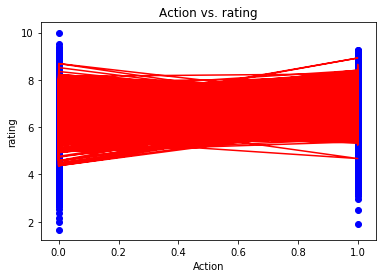

In [6]:
# creating a scatterplot of only one variable to the ratings
plt.scatter(inp[['Action']],modified_dataset[['rating']], color = 'blue')
plt.plot(inp[['Action']], linear_model.predict(inp), color = 'red')
plt.title('Action vs. rating')
plt.xlabel('Action')
plt.ylabel('rating')
plt.show()

Of course, since the input variables are not in running order, the above is also not a good representation of the model either. We know that the `R^2` value is the measure of how deviated the label is, hence a good way to represent this is to sort the `labels` in order, then predict according to the ordered `label`'s corresponding `input` and overlay the result  as a line/scatterplot on the `labels` scatterplot. we can see whether the result is well represented by the regression model.

We will split the dataset into sets of 1000s, to visualizing the data in parts.

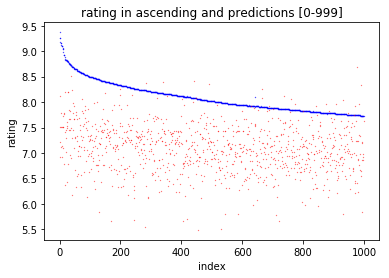

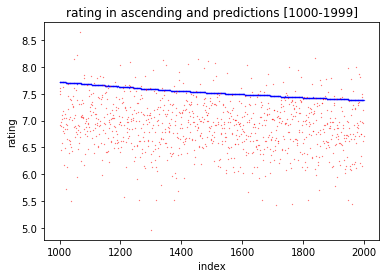

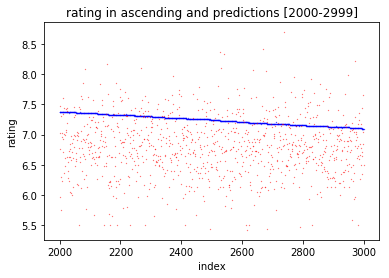

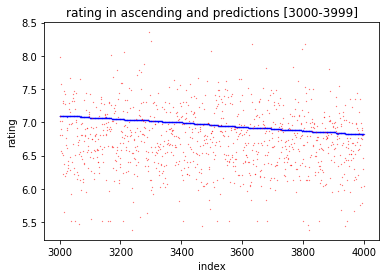

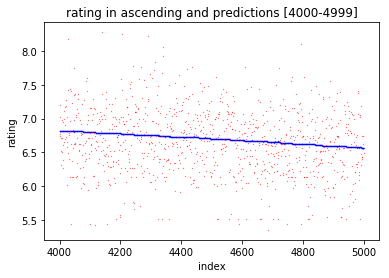

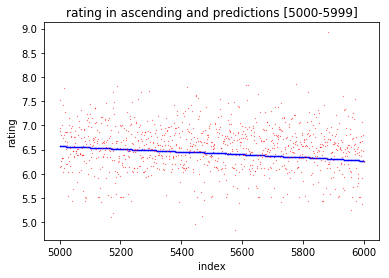

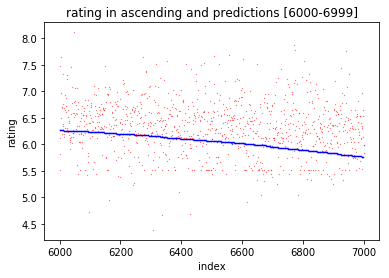

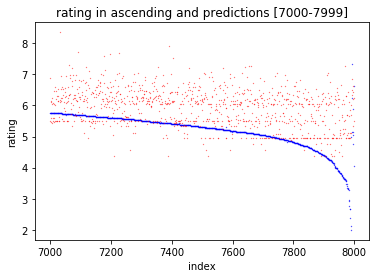

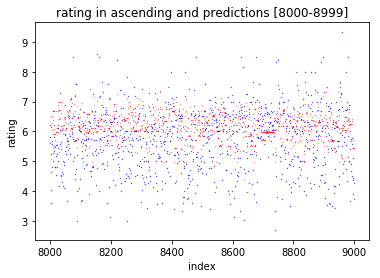

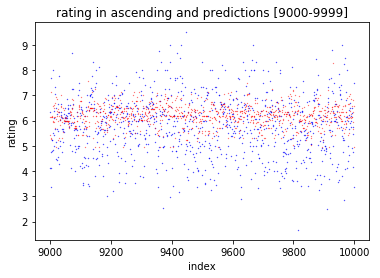

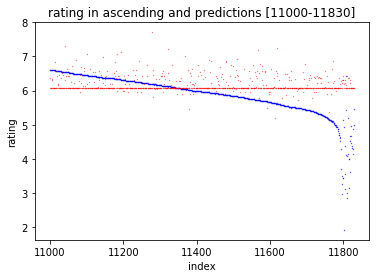

In [7]:
import numpy as np

# First, we add identifiers on all the rows for the "scatterplot" to be general
index = np.arange(0,len(inp),1)

# creating scatterplots of ratings and the model prediction
for ind in range(0,10):
    plt.scatter(index[:][(ind*1000):((ind+1)*1000)],modified_dataset[['rating']][(ind*1000):((ind+1)*1000)], color = 'blue', s = 0.1)
    plt.scatter(index[(ind*1000):((ind+1)*1000)], linear_model.predict(inp[(ind*1000):((ind+1)*1000)]), color = 'red', s = 0.05)
    plt.title('rating in ascending and predictions [%d-%d]' % (ind*1000,(ind+1)*1000-1))
    plt.xlabel('index')
    plt.ylabel('rating')
    plt.show()

# creating a scatterplot of ratings and the regression lines
plt.scatter(index[:][11000:11830],modified_dataset[['rating']][11000:11830], color = 'blue', s = 0.1)
plt.scatter(index[:][11000:11830], linear_model.predict(inp[:][11000:11830]), color = 'red', s = 0.05)
plt.title('rating in ascending and predictions [11000-11830]')
plt.xlabel('index')
plt.ylabel('rating')
plt.show()

For the graphs above, `Red` is the predicted values while `Blue` is the actual values. If the `R^2` perfectly explains the dataset, then it should briefly follow the actual values (`Blue` points). Thus, the `R^2` value is justified as we can see it only explains to a minor degree. Most of the graphs we can see it basically cannot predict the values at all. 

Why is this the case? This must be because the algorithm used is not suited to solve this problem. I have narrowed it down to three primary reasons: `not suitable algorithm`, `noise`, and `hidden features`.

### Not suitable algorithm?
Let's try to explain it from `not suitable algorithm` perspective. 
The actual data, believe it or not, is not linear at all and almost impossible to have high correlation, and hence using a Linear model will generalize the dataset. However, the regression model cannot be made into a polynomial as `0^2 = 0` and `1^2 = 1`, hence modifying the dummy variable orders is not a good method to model this dataset. One way I can think of to modify the algorithm is to allow heavy punishment if one category doesn't exist and provide light feedback if it exist or vice versa.


Instead of the following:
- ` y = a + bx1 + cx2 + dx3 + ...`

We train the following instead:
- `y = a + log(b+x1) + log(c+x2) + log(d+x3) + ...`

(if b = -0.5, then the punishment and reward is the same;

if b>-0.5, the reward is low and the punishment is high; 

if b<-0.5, the reward is high and the punishment is low)

This algorithm is not tested and I thought of this algorithm on my own. However, I am curious to see if it will work. Testing it out in this assignment may prove to be too large of a project.

### Noise?

`Noise` basically means outliers. I believe that this may be a factor, so I decided to check by rebuilding the model and checking it again various evaluation metrics to see if it plays a role in my dataset.

Looking at the curve sorted by popularity in ascending order:

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
5         32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6         11061                             Hunter x Hunter (2011)   
7           820                               Ginga Eiyuu Densetsu   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9         15417                           Gintama&#039;: Enchousen   
10         4181                               Clannad: After Story   
11        28851                                     Koe no Katachi   
12          918                                            Gintama   
13         2904     

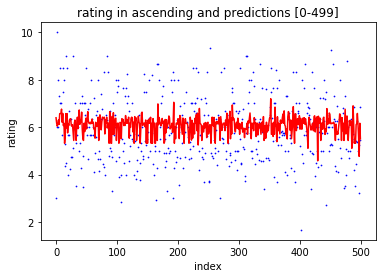

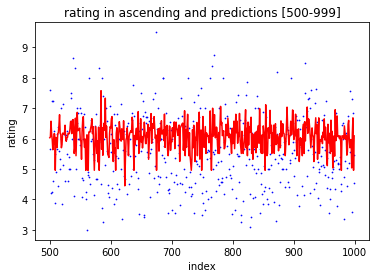

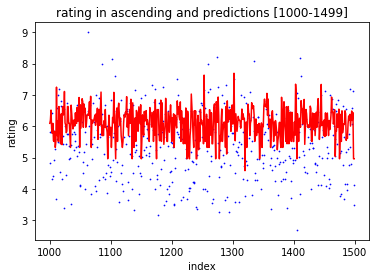

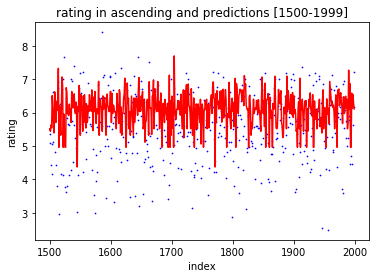

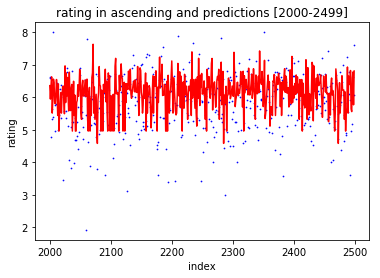

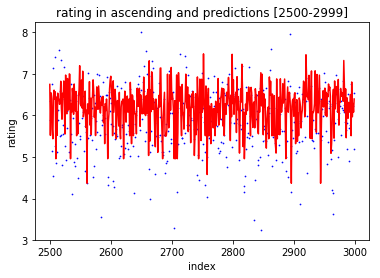

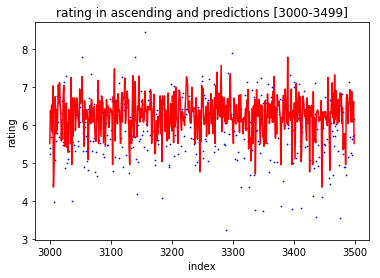

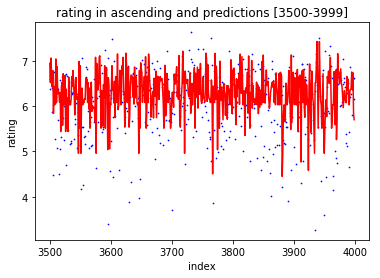

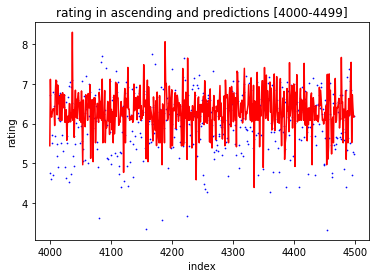

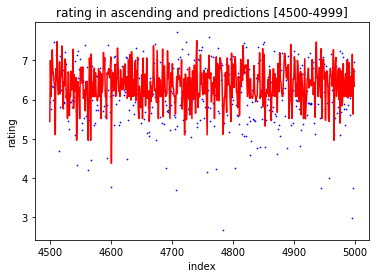

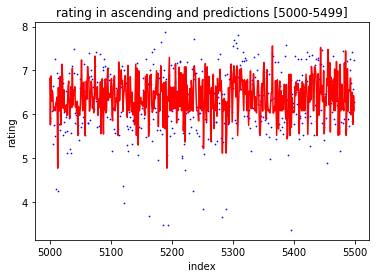

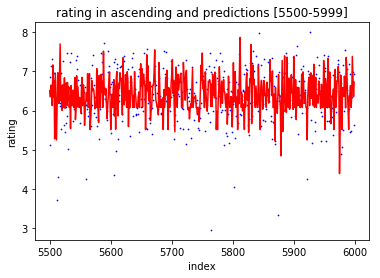

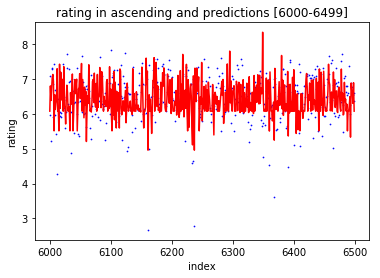

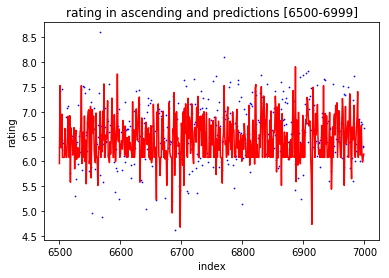

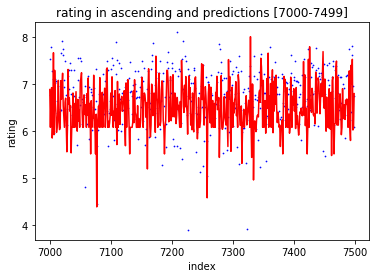

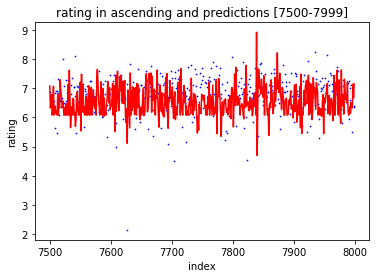

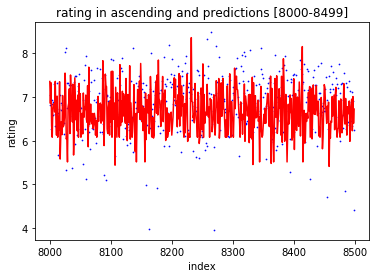

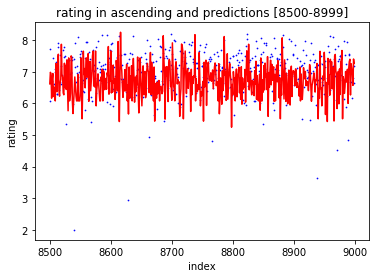

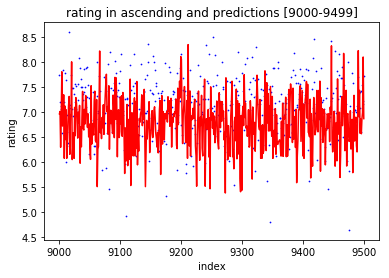

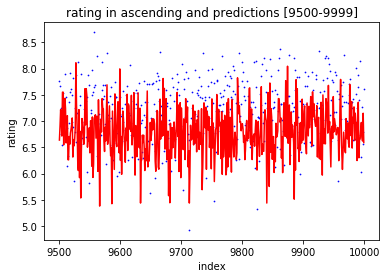

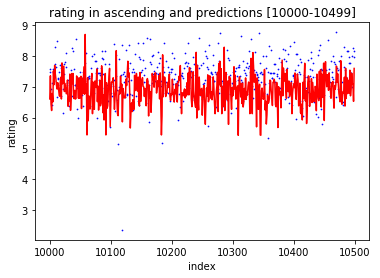

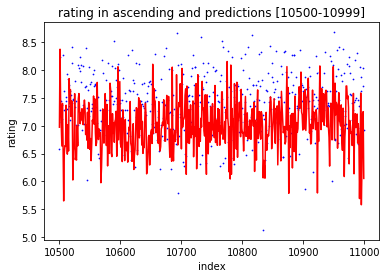

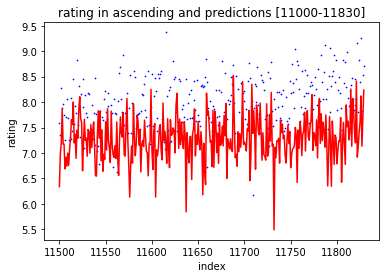

In [8]:
# Sort by number of members
sorted_modified_dataset = modified_dataset.sort_values('members')
genres = sorted_modified_dataset['genre'].str.get_dummies(', ').astype(int)
types = sorted_modified_dataset['type'].str.get_dummies(', ').astype(int)
print(modified_dataset)

# Upon inspection the type had music as type, and music as genre. Rename column
types.columns = ['Movie', 'Music1', 'ONA', 'OVA', 'Special', 'TV']

# Combining to form inp variables
sorted_inp = genres.join(types)

# printing scatterplot ratings vs label, separated by rows for readability 
for ind in range(0,22):
    plt.scatter(index[:][(ind*500):((ind+1)*500)],sorted_modified_dataset[['rating']][(ind*500):((ind+1)*500)], color = 'blue', s = 0.5)
    plt.plot(index[(ind*500):((ind+1)*500)], linear_model.predict(sorted_inp[(ind*500):((ind+1)*500)]), color = 'red')
    plt.title('rating in ascending and predictions [%d-%d]' % (ind*500,(ind+1)*500-1))
    plt.xlabel('index')
    plt.ylabel('rating')
    plt.show()

# creating final scatterplot of ratings and the regression lines
plt.scatter(index[:][11500:11830],sorted_modified_dataset[['rating']][11500:11830], color = 'blue', s = 0.5)
plt.plot(index[:][11500:11830], linear_model.predict(sorted_inp[:][11500:11830]), color = 'red')
plt.title('rating in ascending and predictions [11000-11830]')
plt.xlabel('index')
plt.ylabel('rating')
plt.show()

Since the rating is in ascending order, the first few graphs show `anime` that are not so popular, meanwhile the last few graphs show the `anime` that are the most popular. 

As apparent from the graph of ratings from 0-499 popularity, the model cannot predict the ratings at all, while at the last graph (11000-11830), the model seems to understand the trend, but is constantly underpredicting, meanwhil in the middle of the ratings (5500-5999), the model can explain the trends better. This I believe has something to do with `macro phenomena` and `micro phenomena`. 

When any movie/show is not popular, it doesn't attract a general audience, meaning the audience can be very unpredictable, and applying a general model explaining common behaviours from audiences in common movies/shows to explain the behaviours of these unpredictable audience enjoying these less popular shows will prove to be ineffective. Or in short, a `macro phenomena` cannot explain a `micro phenomena` accurately. These `micro phenomena` datapoints are what I mean by `noise` in the dataset as they <i>do not generally explain the phenomena</i> and should maybe be discarded from training.

However, with movies that are exceptionally popular, they do not follow a general trend either as the ratings generally mean the quality of an anime in English terms. It could be that it has exceptionally well story telling and the 'hot' genres just don't fit it. However, let's still try to see if the model can predict it >:D

Equipped with this insight, let's proceed to remove all moves with less than 2000 reviewers and more than 70,000 reviewers:

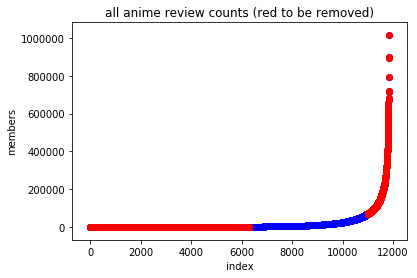

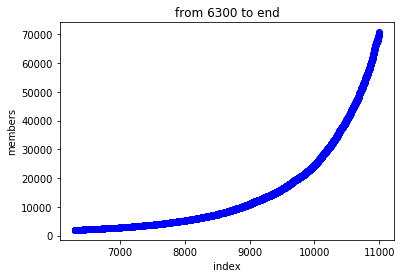

In [9]:
# showing number of members:

plt.scatter(x=index, y=sorted_modified_dataset['members'], color = "blue") # showing all of the graph
plt.scatter(x=index[:][:6300], y=sorted_modified_dataset['members'][:6300], color = "red")
plt.scatter(x=index[:][11000:11830], y=sorted_modified_dataset['members'][11000:11830], color = "red")
plt.xlabel('index')
plt.ylabel('members')
plt.title('all anime review counts (red to be removed)')
plt.show()

plt.scatter(x=index[:][6300:11000], y=sorted_modified_dataset['members'][6300:11000], color = "blue") # approximating where the 2000 value is
plt.xlabel('index')
plt.ylabel('members')
plt.title('from 6300 to end')
plt.show()

In [10]:
# train the model from this point onwards to see if it helps to generalize the model
no_outlier_linear_model = LinearRegression().fit(sorted_inp[6300:11000], sorted_modified_dataset['rating'][6300:11000])

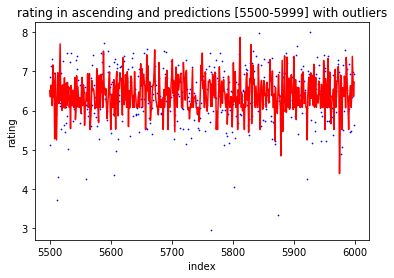

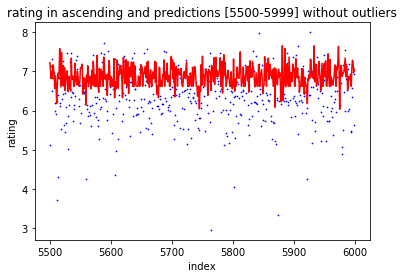

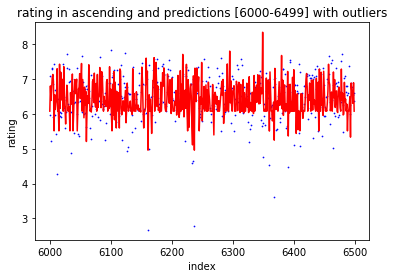

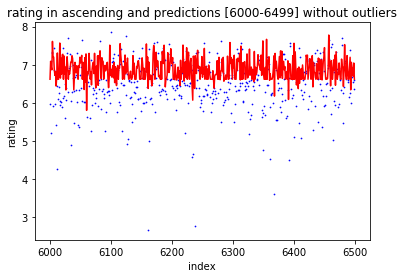

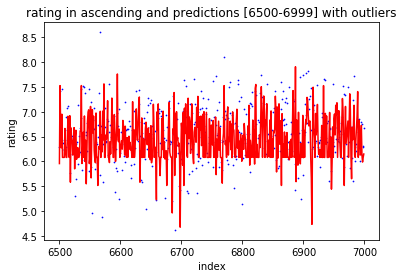

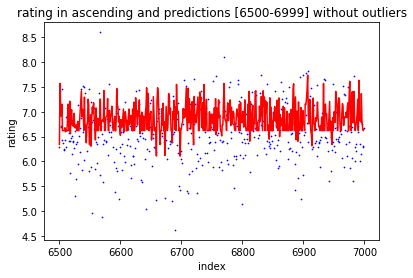

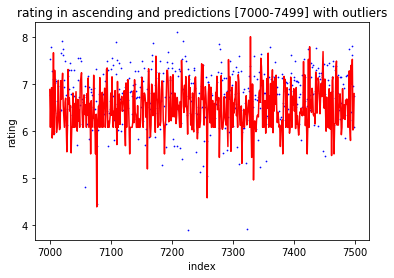

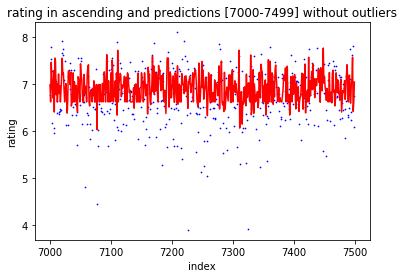

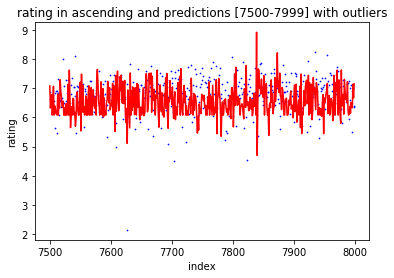

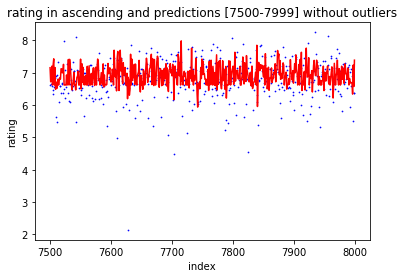

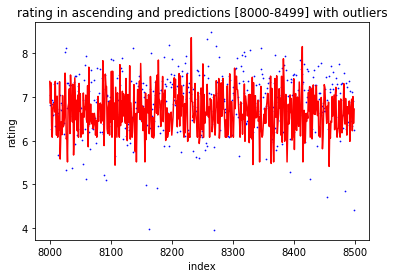

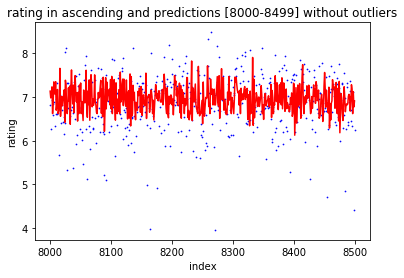

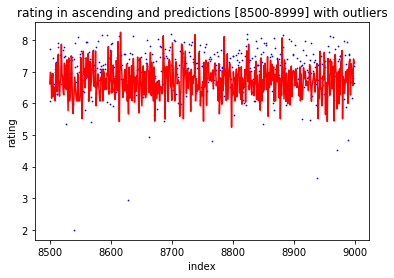

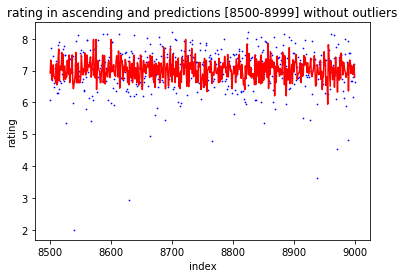

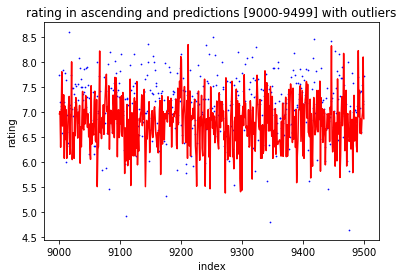

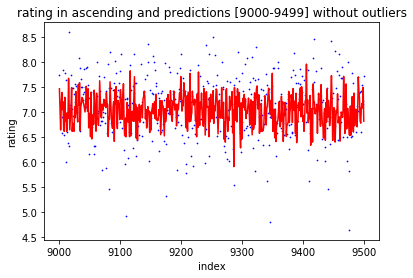

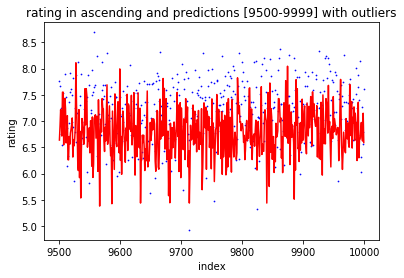

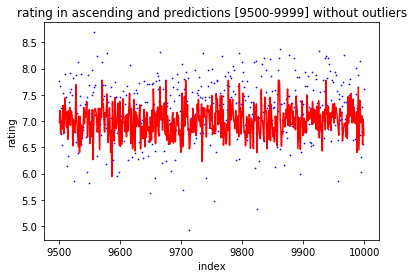

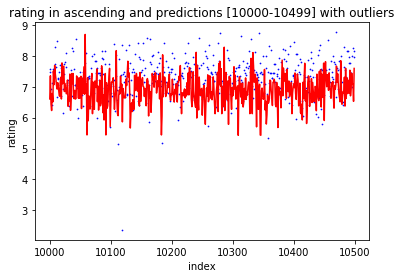

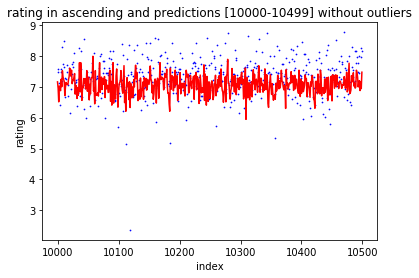

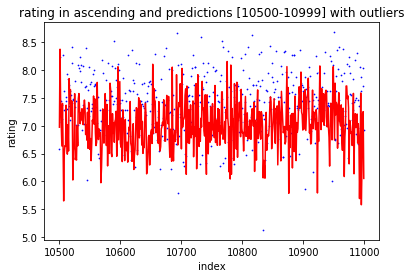

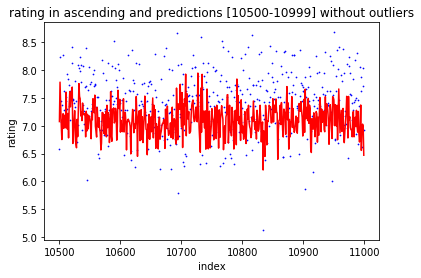

In [11]:
# visualization from 6300 to 11000:
for ind in range(11,22):
    plt.scatter(index[:][(ind*500):((ind+1)*500)],sorted_modified_dataset[['rating']][(ind*500):((ind+1)*500)], color = 'blue', s = 0.5)
    plt.plot(index[(ind*500):((ind+1)*500)], linear_model.predict(sorted_inp[(ind*500):((ind+1)*500)]), color = 'red')
    plt.title('rating in ascending and predictions [%d-%d] with outliers' % (ind*500,(ind+1)*500-1))
    plt.xlabel('index')
    plt.ylabel('rating')
    plt.show()
    plt.scatter(index[:][(ind*500):((ind+1)*500)],sorted_modified_dataset[['rating']][(ind*500):((ind+1)*500)], color = 'blue', s = 0.5)
    plt.plot(index[(ind*500):((ind+1)*500)], no_outlier_linear_model.predict(sorted_inp[(ind*500):((ind+1)*500)]), color = 'red')
    plt.title('rating in ascending and predictions [%d-%d] without outliers' % (ind*500,(ind+1)*500-1))
    plt.xlabel('index')
    plt.ylabel('rating')
    plt.show()

In [12]:
# comparing r2 values
print(str(linear_model.score(sorted_inp,sorted_modified_dataset[['rating']])) + ' vs.' + str(no_outlier_linear_model.score(sorted_inp[:][6300:11000],sorted_modified_dataset[['rating']][6300:11000])))

0.32398600194122296 vs.0.21160274819843594


What? I thought the model should perform better? Why did it perform significantly worse?????

Here, I want to explore more on R^2:

A negative `R^2` value may seem illogical as first since it is just the squared of r value mathematically speaking, however looking at the formula and its official definition it is not hard to understand what it means. 

The `R^2` values is written as such:
- `R^2` = 1 - `SSE`/`SST` whereby
- `SSE` = Difference between actual observation and predicted value
- `SST` = Difference between actual observation and mean

a negative value means that the mean line is even more representative of the datapoints!

Uh oh! what does this mean? Was the data we removed not noise? 

Upon further pondering, I figured maybe removing the 'outliers' as such does not really make sense. Some `anime` really are popular and really deserve their high amounts of view, meanwhile some `anime` are genuinely bad, hence were given bad ratings. I decided to remove those that have abnormally high ratings in the less popular region as they are the ' true' outliers! 

In [13]:
# only leave rows which have more than 2100 members and less than 5.7(2100 and 5.7 are numbers that are arbritarily set)
no_outlier_dataset = sorted_modified_dataset[~((modified_dataset['members'] <= 2000) & (modified_dataset['rating'] >= 5.7))] 
print(no_outlier_dataset)

# Splitting the 'genre' column and type column
no_outlier_genres = no_outlier_dataset['genre'].str.get_dummies(', ').astype(int)
no_outlier_types = no_outlier_dataset['type'].str.get_dummies(', ').astype(int)

# Upon inspection the type had music as type, and music as genre. Rename column
no_outlier_types.columns = ['Movie', 'Music1', 'ONA', 'OVA', 'Special', 'TV']

# Combining to form inp variables
no_outlier_inp = no_outlier_genres.join(no_outlier_types)
# creating train test split
no_outlier_inp_train, no_outlier_inp_test, no_outlier_label_train, no_outlier_label_test = train_test_split(no_outlier_inp, 
            no_outlier_dataset[['rating']], test_size = 0.1, random_state = 1509)

# Question 2: is the rating of the movie based on genre and type, ignoring outliers?
no_outlier_linear_model = LinearRegression().fit(no_outlier_inp_train,no_outlier_label_train)

/home/spdpnd98/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


       anime_id                                               name  \
10444     34490                                     Sushi Azarashi   
10208     33539          Shima Kousaku no Asia Risshi-den Specials   
10035     34406                                       Punpun Polka   
8660      34464                                 Gijinka de Manabo!   
8339      33831                             Chii-chan no Kageokuri   
9255      34286                                           KiyaKiya   
10116     33857  Saitama-ken Zaijuu, Fujiyama Osamu, 33-sai, Mu...   
10701     33084                     Wa Wa Wa Wappi-chan 2nd Season   
8892      34115           Hitori de Nayamanaide Issho ni Kangaeyou   
10700     33083                                Wa Wa Wa Wappi-chan   
9938      33913                                             Peeban   
9257      34120                                       Kizuna (ONA)   
8736      33349              Hajimete no Eigo: Sekai Meisaku Douwa   
9664      33861     

In [14]:
# checking R^2 values of train dataset
print('Using the train set, the R-squared value of the model is %f' %(no_outlier_linear_model.score(no_outlier_inp_train, no_outlier_label_train)))

# checking R^2 values of test dataset
print('Using the test set, the R-squared value of the model is %f' %(no_outlier_linear_model.score(no_outlier_inp_test, no_outlier_label_test)))

Using the train set, the R-squared value of the model is 0.425886
Using the test set, the R-squared value of the model is 0.428243


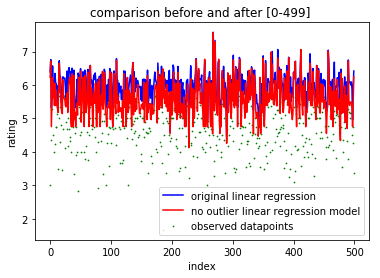

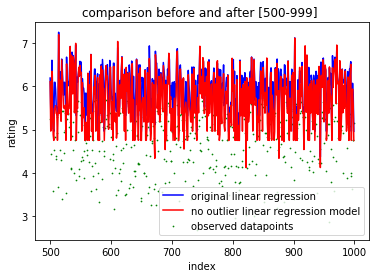

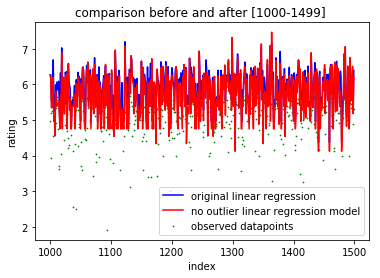

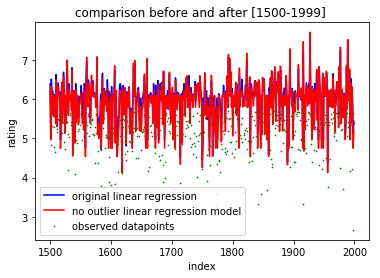

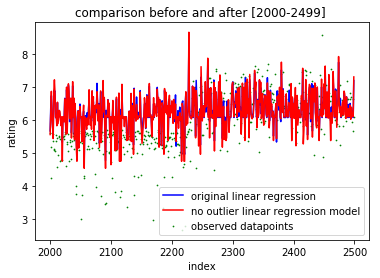

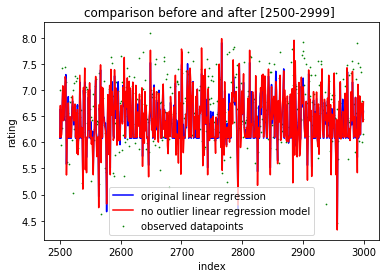

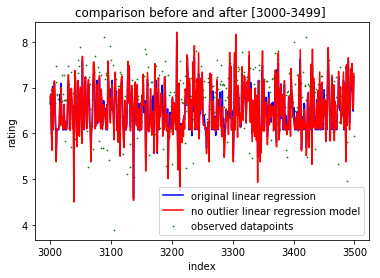

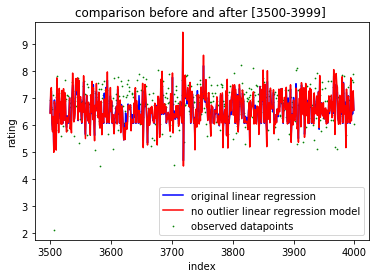

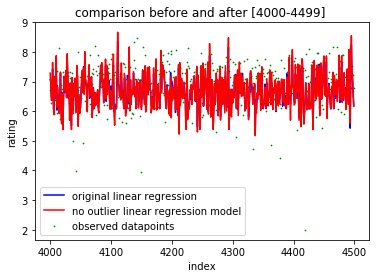

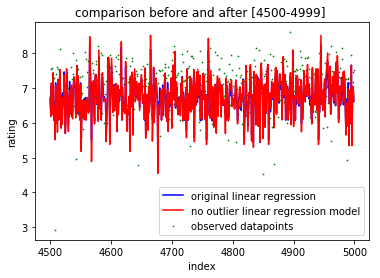

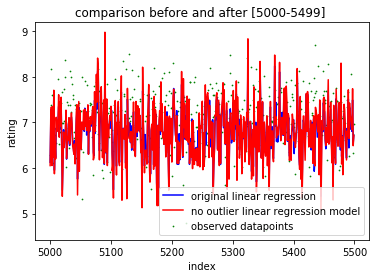

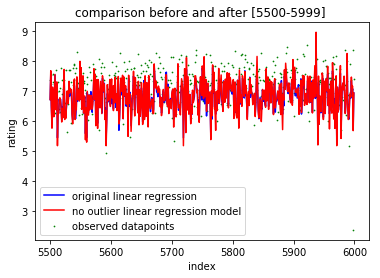

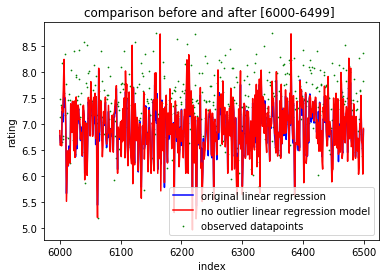

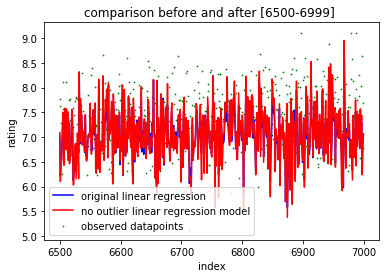

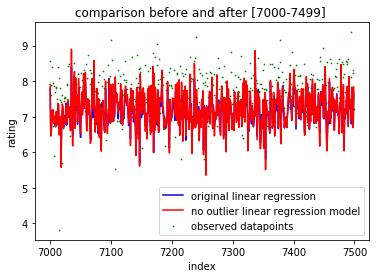

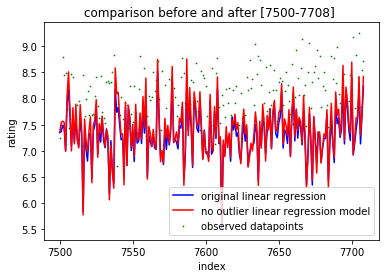

In [15]:
# visualization with wrong outliers removed and correct outliers removed:
for ind in range(0,15):
    plt.plot(index[(ind*500):((ind+1)*500)], linear_model.predict(no_outlier_inp[(ind*500):((ind+1)*500)]), color = 'blue',label='original linear regression')
    plt.plot(index[(ind*500):((ind+1)*500)], no_outlier_linear_model.predict(no_outlier_inp[(ind*500):((ind+1)*500)]), color = 'red',label='no outlier linear regression model')
    plt.scatter(index[:][(ind*500):((ind+1)*500)],no_outlier_dataset[['rating']][(ind*500):((ind+1)*500)], color = 'green', s = 0.5, label='observed datapoints')
    plt.title('comparison before and after [%d-%d] ' % (ind*500,(ind+1)*500-1))
    plt.xlabel('index')
    plt.ylabel('rating')
    plt.legend(loc='best')
    plt.show()

plt.plot(index[7500:7709], linear_model.predict(no_outlier_inp[7500:7709]), color = 'blue',label='original linear regression')
plt.plot(index[7500:7709], no_outlier_linear_model.predict(no_outlier_inp[7500:7709]), color = 'red',label='no outlier linear regression model')
plt.scatter(index[:][7500:7709],no_outlier_dataset[['rating']][7500:7709], color = 'green', s = 0.5, label='observed datapoints')
plt.title('comparison before and after [%d-%d] ' % (7500,7709-1))
plt.xlabel('index')
plt.ylabel('rating')
plt.legend(loc='best')
plt.show()

Not only has the `R^2` value improve by approximately `11%`, the `train set` and `test set` do not vary from each other as much anymore! This shows the model is representative of the general trend of `anime` genre!

With that said, we removed approximately `34.8` percent of datapoints. Does it make the model less accurate?

However, I would assume it does not perform as well if we are to predict which are anime that are very bad. In fact, if these datapoints really are the `noise`, then the `R^2` values from these datapoints only should be extremely bad. Let's verify:

In [16]:
# only contain rows which have less than 2100 members and more than 5.7(2100 and 5.7 are numbers that are arbritarily set)
# Combinations that I have tried: 2000 vs 7, 200 vs 6, 2000 vs 5, 2000 vs 5.3, 2000 vs 5.4, 2000 vs 5.5, 2050 vs 5.5, 2050 vs 7, 2050 vs 6 
outlier_dataset = sorted_modified_dataset[((modified_dataset['members'] <= 2000) & (modified_dataset['rating'] >= 5.7))] 
print(outlier_dataset)

# Splitting the 'genre' column and type column
outlier_genres = outlier_dataset['genre'].str.get_dummies(', ').astype(int)
outlier_types = outlier_dataset['type'].str.get_dummies(', ').astype(int)

# Upon inspection the type had music as type, and music as genre. Rename column
outlier_types.columns = ['Movie', 'Music1', 'ONA', 'OVA', 'Special', 'TV']

# Combining to form inp variables
outlier_inp = outlier_genres.join(outlier_types)
# creating train test split
outlier_inp_train, outlier_inp_test, outlier_label_train, outlier_label_test = train_test_split(outlier_inp, 
            outlier_dataset[['rating']], test_size = 0.1, random_state = 1509)

# Question 2: is the rating of the movie based on genre and type, ignoring outliers?
outlier_linear_model = LinearRegression().fit(outlier_inp_train,outlier_label_train)

       anime_id                                               name  \
10464     33662            Taka no Tsume 8: Yoshida-kun no X-Files   
8367      34259                Chotto Ugoku!? &quot;Futeneko&quot;   
8598      33827               Gakushuu Animation Nihon Koku Kenpou   
9805      34363                      Ocha-ken: Ryokutto Monogatari   
9701      33826                             Neko no Kuni no Kenpou   
10500     33822                Ten ni Yaka Reru: E ni Yoru Shougen   
10146     33824                                    Satoukibibatake   
8638      33823                            Genbaku Dome Monogatari   
8155      34249                                          Aqua Kids   
9341      34201                           Kuni-chan no Ikka Ranran   
8575      33842            Fushigi no Yappo Shima: Pukipuki to Poi   
8535      33792                               Feng Shu Zhan Jing 2   
10136     34191                          Santa-san wa Dai Isogashi   
8152      33821     

/home/spdpnd98/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# checking R^2 values of train dataset
print('The R-squared value of the model is %f' %(outlier_linear_model.score(outlier_inp_train, outlier_label_train)))

# checking R^2 values of test dataset
print('The R-squared value of the model is %f' %(outlier_linear_model.score(outlier_inp_test, outlier_label_test)))

The R-squared value of the model is 0.152838
The R-squared value of the model is 0.127255


Wow, look at that `R^2` value! This model practically can't explain anything! Our hypothesis was correct! Let's go ahead and predict for all the data again with this new model:

In [18]:
# kfold method
kfold = KFold(n_splits = 10, random_state = 1509, shuffle=True)
# obtaining the cross validation result with train dataset
result = model_selection.cross_val_score(no_outlier_linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model without outliers(original train data): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

result = model_selection.cross_val_score(linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model with outliers(original train data): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

R squared of Regression model without outliers(original train data): 0.317437, the standard deviation is: 0.019048
R squared of Regression model with outliers(original train data): 0.317437, the standard deviation is: 0.019048


I could not believe my eyes. Those results were not affected by the outliers? Let's try the modified dataset without the outliers:

In [19]:
# outlier model
result = model_selection.cross_val_score(linear_model, no_outlier_inp_train, no_outlier_label_train.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model with outlier (train data without outliers): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

# no outlier model
result = model_selection.cross_val_score(no_outlier_linear_model, no_outlier_inp_train, no_outlier_label_train.values.ravel(),
                                         cv=kfold, scoring=r2)
print("R squared of Regression model without outlier(train data without outliers): %f, the standard deviation is: %3f" %(result.mean(),result.std()))

R squared of Regression model with outlier (train data without outliers): 0.415587, the standard deviation is: 0.033637
R squared of Regression model without outlier(train data without outliers): 0.415587, the standard deviation is: 0.033637


Nothing changed whatsoever. This means that the "outliers" were conviniently ignored by the original model. In short, the 'outliers' were not the reason for the inaccuracy of data, even though it seemingly improved the model.

### Hidden Features unrecorded

Finally, this isn't the only logical result nor explanation. This phenomena must be attributed to the complexity of the human brain, behaviour, emotions etc. These data are hard to accquired/ document, hence are considered `hidden features`. This isn't something that can be simply generalized by conventional Machine Learning approach. In order to proceed, we must use Deep Learning to make more accurate predictions.

## Other metrics: `MAE` and `MSE`
Let's explore 2 new metrics: Mean Absolute Error (`MAE`) vs Mean Squared Error (`MSE`)

These 2 metrics are very common when it comes to defining if a model performs well, in combination with `R^2` we can gather very important insights on which model to choose.

The Mean Absolute Error can be calculated by summing the absolute values of difference between the observation labels and predictions, then dividing by the number of observations. Meanwhile the Mean Squared Error is almost identical, instead of summing the absolute values, we square the differences then sum all of the results, then divide by number of instances.

Explaining the mathematical formula is boring. What does it mean to us humans?

I really like the analogy given in an article written by Manoj Dobali from towardsdatascience.com. MSE is used when we want to exemplify errors, say if the actual number is 5, predicting as a number 10 is more than twice the error. An example I can think of is say a robot is to move 5 units forward, a prediction of 5.1 units forward may lead to it falling out of the ring/area, causing irrepairable damage. In this case even if the difference is 0.1 units, it could mean millions of dollars or even lives! In my opinion, we can actually increase the order of this metrics to ensure a Deep Learning model can not only perform well, but minimizing the damage (lower movement is preferable compared to higher movement in this case). In the case of ratings of a movie, according to the graph plotted previously showing the rating of `anime`, a rating of 7 and a rating of 8 can have a huge differnce in popuarity. Lets take a look:

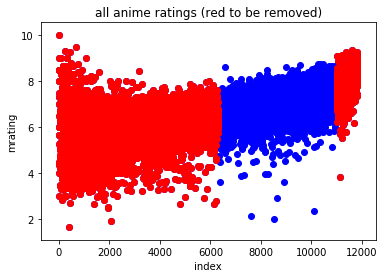

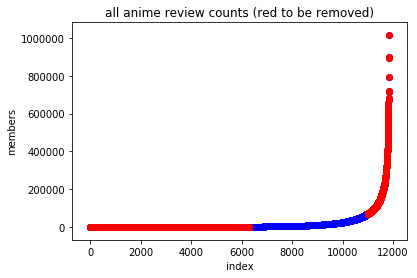

In [20]:
# showing number of members and their ratings:
plt.scatter(x=index, y=sorted_modified_dataset['rating'], color = "blue") # showing all of the graph
plt.scatter(x=index[:][:6300], y=sorted_modified_dataset['rating'][:6300], color = "red")
plt.scatter(x=index[:][11000:11830], y=sorted_modified_dataset['rating'][11000:11830], color = "red")
plt.xlabel('index')
plt.ylabel('mrating')
plt.title('all anime ratings (red to be removed)')
plt.show()

# Recap of the members curve
plt.scatter(x=index, y=sorted_modified_dataset['members'], color = "blue") # showing all of the graph
plt.scatter(x=index[:][:6300], y=sorted_modified_dataset['members'][:6300], color = "red")
plt.scatter(x=index[:][11000:11830], y=sorted_modified_dataset['members'][11000:11830], color = "red")
plt.xlabel('index')
plt.ylabel('members')
plt.title('all anime review counts (red to be removed)')
plt.show()

As we can see, the red region on the right is actually the majority of the people that enjoy the movie! if we take a difference between 9 and 9.5 as just a 0.5 unit difference, we may be leaving out hunderds of thousands of audiences!

With that being said, if we look at the left side of the curve (ignoring the datapoints we considered as outliers), a difference between the rating of 6 and 7 could only account for small amounts of people (in the order of hundreds and/or thousands), this may be subjective depending on what is your target amount of audience, but if you aim to create a blockbuster level of `anime`, it may not matter as much if you are 6 or 7 rating versus if you are 9 or 9.5 rating.

Before we jump into any conclusions, let's also explore `MAE`. This metric is especially useful in fields like business and finance, whereby a difference between 5 dollars and 10 dollars is really just twice the predicted value. Hence, we can say it penalizes less compared to `MSE` to errors, outliers are not as important as non-outliers.

Let's see the `MAE` and `MSE` of the regression model trained with and without outliers:

In [21]:
# Comparing MAE of the models
result_MAE_model1 = model_selection.cross_val_score(linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=MAE)
result_MAE_model2 = model_selection.cross_val_score(no_outlier_linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=MAE)
print("MAE of old Regression model (train data): %f, MAE of new Regression model (train data): %f" %(result_MAE_model1.mean(),result_MAE_model2.mean()))

MAE of old Regression model (train data): -0.648933, MAE of new Regression model (train data): -0.648933


In [22]:
# Comparing MAE of the models
result_MSE_model1 = model_selection.cross_val_score(linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=MSE)
result_MSE_model2 = model_selection.cross_val_score(no_outlier_linear_model, inp_train, label_train.values.ravel(),
                                         cv=kfold, scoring=MSE)
print("MSE of old Regression model (train data): %f, MSE of new Regression model (train data): %f" %(result_MSE_model1.mean(),result_MSE_model2.mean()))

MSE of old Regression model (train data): -0.709493, MSE of new Regression model (train data): -0.709493


As proven by the example above, we have retrained our model by discarding points we think are outliers based on "domain knowledge", and the results show visually no difference, meaning the outliers do not play a part in the model's prediction, and have been conviniently ignored by the model, yet again.

This means that the outliers really <i>do not affect</i> the model's performance, as with combination with `R2`, all three metrics show no improvement removing the 'outliers'.

Let's compare it with the algorithm whereby we have removed columns. 

Here since we cannot use an object from `statsmodels` in `scikitlearn`, we will just use the functions given by `statsmodels`. It basically finds the absolute difference using `numpy` for `MAE` and the squared difference for `MSE`.

In [23]:
from statsmodels.tools.eval_measures import mse, meanabs

# Pass in the observed data and predicted data for mean absolute error
col_removed_model_MAE = meanabs(Y,est2.predict(X))
original_model_MAE = meanabs(Y_raw,est2_original.predict(X_raw))

print('The original train data has MAE of: %f, while the modified train data has MAE of: %f' % (original_model_MAE.mean(), col_removed_model_MAE.mean()))

# Pass in the observed data and predicted data for mean squared error
col_removed_model_MSE = mse(Y,est2.predict(X))
original_model_MSE = mse(Y_raw,est2_original.predict(X_raw))

print('\nThe original train data has MSE of: %f, while the modified train data has MSE of: %f' % (original_model_MSE.mean(), col_removed_model_MSE.mean()))

X_raw_test = sm.add_constant(inp_test.astype(float))
Y_raw_test = label_test.astype(int)

X_test = sm.add_constant(inp_test_modified.astype(float))
Y_test = label_test.astype(int)

from statsmodels.tools.eval_measures import mse, meanabs

# Pass in the observed data and predicted data for mean absolute error
col_removed_model_MAE = meanabs(Y_test,est2.predict(X_test))
original_model_MAE = meanabs(Y_raw_test,est2_original.predict(X_raw_test))

print('\nThe original test data has MAE of: %f, while the modified test data has MAE of: %f' % (original_model_MAE.mean(), col_removed_model_MAE.mean()))

# Pass in the observed data and predicted data for mean squared error
col_removed_model_MSE = mse(Y_test,est2.predict(X_test))
original_model_MSE = mse(Y_raw_test,est2_original.predict(X_raw_test))

print('\nThe original test data has MSE of: %f, while the modified test data has MSE of: %f' % (original_model_MSE.mean(), col_removed_model_MSE.mean()))

The original train data has MAE of: 0.947026, while the modified train data has MAE of: 0.946422

The original train data has MSE of: 1.446277, while the modified train data has MSE of: 1.444711

The original test data has MAE of: 0.934978, while the modified test data has MAE of: 0.934390

The original test data has MSE of: 1.402985, while the modified test data has MSE of: 1.400831


/home/spdpnd98/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Observing the `MAE`, the original train dataset obtained a `0.947026` meanwhile the modified train dataset obtained a `0.946422`, a decrease of `0.0006` in `MAE`. It is apparent that modifying the data can improve the performance of the ratings. However, since we believe that `MSE` is a better metrics, we should also consider its values.

Observing the `MSE`, the original train dataset obtained a `1.446277` meanwhile the modified train dataset obtained a `1.444711`, a decrease of approximately `0.0015` in `MSE`. Again, we see an improvement in the difference in before and after the modification of data.

In `MSE`, any increase and/or decrease in performance is exemplified. Comparing the two metrics, not only is it a relief that the `MAE`'s tendency to decrease is observed, the `MSE` exemplified the improvement throught the modification by approximately twice! However, in real life deploymeny (test data), the improvement is much more than just twice.(`MAE`: `0.0006` vs `0.0006`, `MSE`: `0.0015` vs `0.0021`)

## Conclusion for Regression

In conclusion, I have tested the metrics `R^2`, `MAE`, `MSE`. Removing the outliers in my dataset showed procatically no improvement as shown with all the metrics tested, meanwhile removing columns(variables) show a more significant improvement in terms of `MAE` and `MSE`.

Next up, we take a look at Classification metrics.

# Part 2: Classification model.

We shall continue where we left off.

In [24]:
# Converting member count to 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

bins = [0, 233, 1589, 9832, np.inf]
names_true = ['not popular', 'somewhat popular', 'trending', 'popular']
names = [0,1,2,3]
modified_dataset['Popularity_a'] = pd.cut(modified_dataset['members'], bins, labels = names) 

# print(modified_dataset['Popularity_a'])

# Multiplying 'rating' column with 'members' column
modified_dataset[['Cummulative Rating']] = np.multiply(modified_dataset[['rating']], modified_dataset[['members']])

# Converting 'Cummulative Rating' count to categories
# taking the upper bound
bins = [0, 1375, 10062, 69489, np.inf]
modified_dataset['Popularity_b'] = pd.cut(modified_dataset['Cummulative Rating'], bins, labels = names) 

# print(modified_dataset['Popularity_b'])

# spliting data into test and training set
inp_train, inp_test, label_train, label_test = train_test_split(inp, 
            modified_dataset[['Popularity_a']], test_size = 0.1, random_state = 1509)

# spliting data into test and training set
inp_train2, inp_test2, label_train2, label_test2 = train_test_split(inp, 
            modified_dataset[['Popularity_b']], test_size = 0.1, random_state = 1509)

logistic_model = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train,label_train.values.ravel())
# print(logistic_model)

logistic_model2 = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train2,label_train2.values.ravel())
# print(logistic_model2)

# Trying stratified kfold
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train)
# print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model, inp_train, label_train.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 1 (train data):", result.mean())

# Stratified kfold on Test Data
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_test)
# print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model, inp_test, label_test.values.ravel(),
                                         cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 1 (test data):", result.mean())

stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train2)
# print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model2, inp_train2, label_train2.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 2 (train data):", result.mean())

stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train2)
# print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model2, inp_test2, label_test2.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 2 (test data):",result.mean())

Logistic Model 1 (train data): -1.076213434484746
Logistic Model 1 (test data): -1.1069567344706068
Logistic Model 2 (train data): -1.0753480034303036
Logistic Model 2 (test data): -1.1128931067370247


Predicted    0    1    2    3
Actual                       
0          794  310  579  754
1          761  259  526  699
2          730  263  460  653
3          875  302  627  821


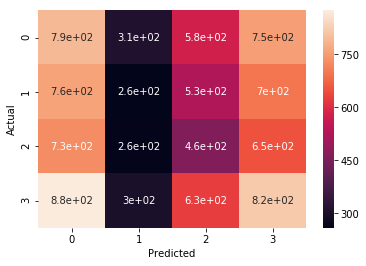

In [25]:
# Model 1
import seaborn as sn
label_pred = logistic_model.predict(inp_train)
label_pred = pd.Series(label_pred, name='Predicted')
label_train = pd.Series(label_train['Popularity_a'], name='Actual', index=label_train.index)
# confusion matrix is created here
model1_confusion = pd.crosstab(label_train, label_pred)
print(model1_confusion)
# plot with seaborn library
sn.heatmap(model1_confusion, annot=True)

Predicted    0    1    2    3
Actual                       
0          796  311  571  746
1          752  258  530  702
2          736  264  464  658
3          876  301  627  821


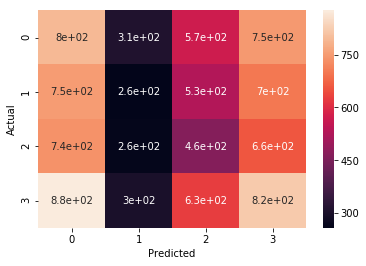

In [26]:
# Model 2
label_pred2 = logistic_model.predict(inp_train2)
label_pred2 = pd.Series(label_pred2, name='Predicted')
label_train2 = pd.Series(label_train2['Popularity_b'], name='Actual', index=label_train2.index)
# confusion matrix is created here
model2_confusion = pd.crosstab(label_train2, label_pred2)
print(model2_confusion)
# Plot heatmap with seaborn library
sn.heatmap(model2_confusion, annot=True)

Predicted   0  1   2   3
Actual                  
2           3  1   2   9
3          42  8  23  38


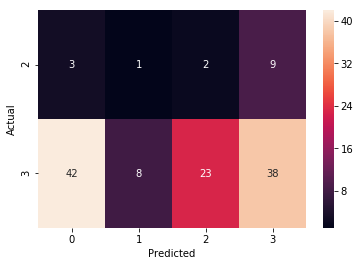

In [27]:
# Model 2 prediction
label_pred2 = logistic_model.predict(inp_test2)
label_pred2 = pd.Series(label_pred2, name='Predicted')
label_test2 = pd.Series(label_test2['Popularity_b'], name='Actual', index=label_test2.index)
# confusion matrix is created here
model2_confusion = pd.crosstab(label_test2, label_pred2)
print(model2_confusion)
# Plot heatmap with seaborn library
sn.heatmap(model2_confusion, annot=True)

Previously, we listed a few supervised learning algorithms and selected `logistic regression` as our algorithm. We then split the dataset into a few sections based on assumptions made on raters and their mentality when rating anime. Next, we used a confusion matrix to show how 'bad' the algorithm performed.

Thinking back, there was so much more I could do, and at so many points whereby I made a bad decision to create this model. There could've been better ways and in this Assignment I'll do my best to explain what I did wrong, improve it, and evaluate the before and after result.

## Mistake #1: Data Preprocessing stage

The first jarring mistake I made was that I naively split the dataset. At this stage, I should be using an `Unsupervised Learning` method to determine how many splits are generally accepted. For this, I have decided to use `K-means` algorithm to label the dataset with `ratings` as the only input, then use it again on `cummulative ratings` to achieve similar results and see what is the difference between the two split results.

## Mistake #2: Insufficient metrics for analysis

The second jarring mistake I made was that I believed that a confusion matrix is sufficient in showing my results. after some careful thought, I think it's more important to explain in terms of `Precision`, `Recall`, `Accuracy`, and `F1-score`, and use the confusion matrix as a visual proof to each of these metrics, fianlly deciding which of these metrics is the most suitable for logical performance.

Below is my attampt to fix these issues:

## KMeans
A general way to do `KMeans` is to find a suitable number of clusters, then cluster according to the suitable number of clusters. The number of clusters is subjective, but can be 'Mathematically calculated' by using the Within-cluster-Sum-Squares (WSS) method. This however can be a bit more computationally expensive but is a neccesary evil.

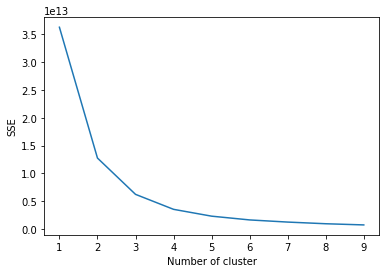

In [28]:
from sklearn.cluster import KMeans
new_input = inp.join(modified_dataset[['members']])
# Using WSS method to find optimal amount of clusters -- a form of hirarchical clustering
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=10000).fit(new_input)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Special thanks to the people at stackoverflow.com for providing the code. The concept of using the above code snippet is to find the Sum Squared Error (SSE) over all the clusters, choose the cluster whereby an increase in another cluster will not improve the SSE. In this case, a good number of cluster can be either 3, 4 or 5. This method of selecting is called the `Elbow Method`, because it represents a human arm.

Great, if we choose 4, our original labels will still be maintained! However, I was curious how my original grouping performed against this method:

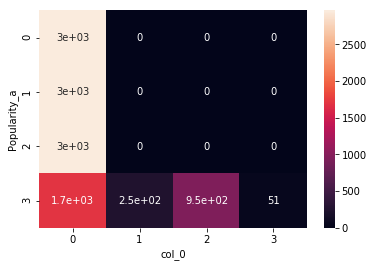

In [29]:
# Kmeans creation, using 4 clusters
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(new_input)
# confusion matrix is created here
kmeans_vs_self_clustering = pd.crosstab(modified_dataset['Popularity_a'], kmeans.labels_)
# Plot heatmap with seaborn library
sn.heatmap(kmeans_vs_self_clustering, annot=True)

According to the heatmap shown above, all from the self made clustering method for `not popular`, `somewhat popular`, `trending`, and more than half of `popular` were supposed to be clustered in `not popular`. That could explain why the model performed so bad. 

Let's see if doing so on `cummulative rating` yields similar results:

First, let's start by using the `WSS` method of optimizing number of cluster.

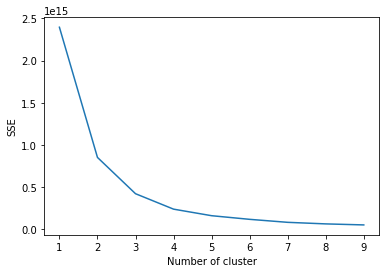

In [30]:
# Using WSS method to find optimal amount of clusters -- a form of hirarchical clustering
sse = {}
for k in range(1, 10):
    kmeans2 = KMeans(n_clusters=k, max_iter=10000).fit(inp.join(modified_dataset[['Cummulative Rating']]))
    sse[k] = kmeans2.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The `WSS` scores seem to both indicate 4 is a good number. Let's see how it performs with my naive method of grouping it with respect to `ratings` multiplied by `members`.

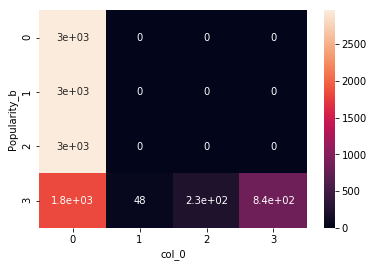

In [31]:
# Creating another kmeans clustering, using the same amounts of clusters
kmeans2 = KMeans(n_clusters=4, max_iter=1000).fit(inp.join(modified_dataset[['Cummulative Rating']]))
# confusion matrix is created here
kmeans_vs_self_clustering = pd.crosstab(modified_dataset['Popularity_b'], kmeans2.labels_)
# Plot heatmap with seaborn library
sn.heatmap(kmeans_vs_self_clustering, annot=True)

Judging from the heatmap, my estimations for clusters are really off!. Regardless, let's try to use logistic regression again and see if our model performed better than before.

Before that, let's think, are there better ways to show how well the model performed?

## Precision, Recall, Accuracy, F1-score

Sometimes outside of class, I would jokingly tell my friends this, 

"Precision is how <i>precise</i> your model is, Recall is how much your model <i>recalled</i> correctly, Accuracy is how <i>accurate</i> your model is to whole dataset, and F1-score is just an aggregation of Precision and Recall, change the coefficients in Precision and Recall terms to emphasize on different metrics."

The most common reply I get is: <i>"Duh, Bryan! That doesn't explain anything at all! We all know that!"</i> Anyone that pays a little more attention will get what I'm trying to say from that simple sentence.

Precision is how <i>precise</i>: Imagine a dartboard, we usually can be precise, but <i>precisely</i> off target. This means that Precision only focuses on <i>observed positives</i>. Intuitively it is just the number of True positives divide by the number of Positive observations by the model. 

Recall is how much your model <i>recalled</i> correctly: Imagine an exam, we only care about how much we remember from the textbook<s>,unfair</s> right? <i>(laughs)</i> This shows an important concept, Recall is just the number of positive/correct observation over the number of <i>initially labeled positive</i> correct observations.

Accuracy is how <i>accurate</i> your model is: In a darts game, if someone is accurate,they are always on target `with` 0 errors. So intuitively, we ignore all the <i>errors/False observations</i> and divide by the total number of observations in the dataset.

F1-score is just an aggregation of Precision and Recall: If we imagine a gigantic water tank, where its flow rate is affected by 2 water-taps flow rate. The water taps represent Precision and Recall, while the the gigantic water tank's flow rate represents F1-score. How much Precision and Recall matters in the water tank's flow rate is defined by how tight the water-taps are turned. If the Recall tap is turned off, F1-score will be completely based on Precision; if Precision tap is turned off, F1-score will be completely based on Recall. Different combinations can also be made and the bias of this score towards Precision and Recall will also change.

<i>"Bryan, you know this all doesn't make sense, right?"</i> Well, let's see if it doesn't! I shall attempt to use this analogy to explain the original `Logistic Regression` model. 

This is the model for 'members'

Precision:
The precision value for not popular is: 0.554353
The precision value for somewhat popular is: 0.388575
The precision value for trending is: 0.454349
The precision value for popular is: 0.577584

Recall:
The recall value for not popular is: 0.744005
The recall value for somewhat popular is: 0.186527
The recall value for trending is: 0.425769
The recall value for popular is: 0.716024

F1-Score: 
The F1-score for not popular is: 0.635328
The F1-score for somewhat popular is: 0.252059
The F1-score for trending is: 0.439595
The F1-score for popular is: 0.639396


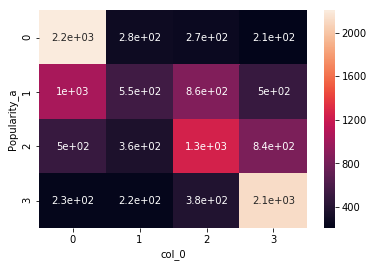

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Preparing code for precision recall and f1 for model1
y_true = modified_dataset["Popularity_a"]
y_pred =  logistic_model.predict(inp)
# calculating Precision 
precision_values = precision_score(y_true=y_true, y_pred=y_pred, average=None)
# calculating Recall
recall_values = recall_score(y_true=y_true, y_pred=y_pred, average=None)
# calculating F1-score
f1_score_values = f1_score(y_true=y_true, y_pred=y_pred, average=None)

# Display
print("This is the model for 'members'\n\nPrecision:")
for i in range(0,len(precision_values)):
    print("The precision value for %s is: %f" % (names_true[i], precision_values[i]))
print("\nRecall:")
for i in range(0,len(recall_values)):
    print("The recall value for %s is: %f" % (names_true[i], recall_values[i]))
print("\nF1-Score: ")
for i in range(0,len(f1_score_values)):
    print("The F1-score for %s is: %f" % (names_true[i], f1_score_values[i]))

# Display
model1 = pd.crosstab(y_true, y_pred)
# Plot heatmap with seaborn library
sn.heatmap(model1, annot=True)

This is the model for 'Cummulative Ratings'

Precision:
The precision value for not popular is: 0.556873
The precision value for somewhat popular is: 0.386897
The precision value for trending is: 0.448389
The precision value for popular is: 0.578604

Recall:
The recall value for not popular is: 0.746450
The recall value for somewhat popular is: 0.189719
The recall value for trending is: 0.414271
The recall value for popular is: 0.720419

F1-Score: 
The F1-score for not popular is: 0.637874
The F1-score for somewhat popular is: 0.254595
The F1-score for trending is: 0.430656
The F1-score for popular is: 0.641771


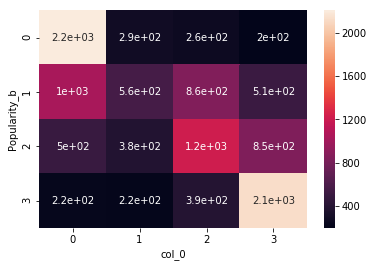

In [33]:
# Preparing variables for predicting Precision, Recall, F1-Score for Cummulative Rating
y_true = modified_dataset["Popularity_b"]
y_pred =  logistic_model2.predict(inp)
# Calculating Precision
precision_values = precision_score(y_true=y_true, y_pred=y_pred, average=None)
# Calculating Recall
recall_values = recall_score(y_true=y_true, y_pred=y_pred, average=None)
# calculating F1-Score
f1_score_values = f1_score(y_true=y_true, y_pred=y_pred, average=None)

# Display
print("This is the model for 'Cummulative Ratings'\n\nPrecision:")
for i in range(0,len(precision_values)):
    print("The precision value for %s is: %f" % (names_true[i], precision_values[i]))
print("\nRecall:")
for i in range(0,len(recall_values)):
    print("The recall value for %s is: %f" % (names_true[i], recall_values[i]))
print("\nF1-Score: ")
for i in range(0,len(f1_score_values)):
    print("The F1-score for %s is: %f" % (names_true[i], f1_score_values[i]))
    
# Plotting
model1 = pd.crosstab(y_true, y_pred)
# Plot heatmap with seaborn library
sn.heatmap(model1, annot=True)

The metrics seems pretty accurate. 

- Precision can be found by taking the correctly predicted divide by the predicted class counts((0,0)/sum(all col_0 0s), and so on);

- Recall can be found by taking the corerectly predicted divide by the count of original label for the class ((0,0)/sum(all Popularity_a 0), and so on);

- F1 takes the sum of the reciprocal of the Precision and Recall and reciprocate it(1/(1/Precision + 1/Recall)).

The trend for both models are pretty much identical as well.

However, which metric is more important? Which model should I use?

## Analysis 

Looking back, I think the model has performed well if it were to `Recall` what was required, but it has very bad `Precision`. In this case, an anime has been predicted to be different levels of Popularity. For each classes, they have their own unique metrics to consider:

1. If we were to predict `not popular` anime it is important that the anime is classified as a bad anime, better than to classify it as a good anime. This means that Considering False Negative is very important as we want to minimize the amounts of bad animes we missed out. Hence if we were to use the model to consider the degree of badness of an anime, we have to see from the `Recall` score.
2. If we were to predict `popular` anime, it is a crime to say more of the anime is considered good, hence considering False Negatives is not really suitable, and using `Precision` is a better call. Hence if we were to use the model to consider the degree of goodness of an anime, we have to see form the `Precision` scores.
3. If we were to generally get an idea how our anime model performed, we need to look at the `F1-score` instead of the `Accuracy` metrics. The above two statements cannot coexist at the same time, hence `Accuracy` is out of the question. However, `F1-score` is a more generalized metric and hence is more suitable.

So, what is the 'Conclusion' for classification on popularity based on members and cummulative ratings?

1. The model is very good at predicting a bad anime.
2. The model is not really good, but slightly above average in predicting a good anime.
3. The model generally cannot predict if an anime is getting better or worse.
4. The model can generally say if an anime is good or bad, but only at the extremes.

Again, to Recap, the level of 'goodness' is classified by yours truly. I think it was a bad way of guessing if an anime is good or bad. It's too early to say if we can or cannot use ML classification algorithms to solve this problem! Let's see from the `KMeans` result, classified with `Logistic Regression`. 

Using `KMeans` of course assumes that the dataset is the ground truth, and that the trend is generally correct despite the number of observations added. with that in mind, let's enhance the model:

Splitting the dataset again:

In [34]:
# Respliting data into test and training set, using new labels, for both new models
inp_train, inp_test, label_train, label_test = train_test_split(inp, 
            kmeans.labels_, test_size = 0.1, random_state = 1509)

inp_train2, inp_test2, label_train2, label_test2 = train_test_split(inp, 
            kmeans2.labels_, test_size = 0.1, random_state = 1509)

logistic_model = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train,label_train)
# print(logistic_model)

logistic_model2 = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train2,label_train2)
# print(logistic_model2)

Training the model:

This is the model for 'members'

Precision:
The precision value for not popular is: 0.259078
The precision value for somewhat popular is: 0.000000
The precision value for trending is: 0.057644
The precision value for popular is: 0.000000

Recall:
The recall value for not popular is: 1.000000
The recall value for somewhat popular is: 0.000000
The recall value for trending is: 0.007778
The recall value for popular is: 0.000000

F1-Score: 
The F1-score for not popular is: 0.411536
The F1-score for somewhat popular is: 0.000000
The F1-score for trending is: 0.013707
The F1-score for popular is: 0.000000


/home/spdpnd98/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/spdpnd98/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


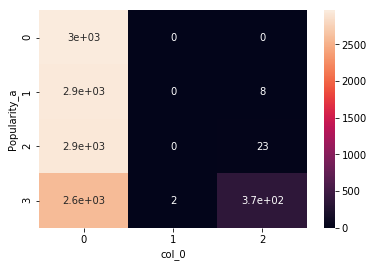

In [35]:
# Preparing model
y_true = modified_dataset["Popularity_a"]
y_pred =  logistic_model.predict(inp)
# Calculating Precision
precision_values = precision_score(y_true=y_true, y_pred=y_pred, average=None)
# Calculating Recall
recall_values = recall_score(y_true=y_true, y_pred=y_pred, average=None)
# Calculating F1-score
f1_score_values = f1_score(y_true=y_true, y_pred=y_pred, average=None)

# Display
print("This is the model for 'members'\n\nPrecision:")
for i in range(0,len(precision_values)):
    print("The precision value for %s is: %f" % (names_true[i], precision_values[i]))
print("\nRecall:")
for i in range(0,len(recall_values)):
    print("The recall value for %s is: %f" % (names_true[i], recall_values[i]))
print("\nF1-Score: ")
for i in range(0,len(f1_score_values)):
    print("The F1-score for %s is: %f" % (names_true[i], f1_score_values[i]))
    
model1 = pd.crosstab(y_true, y_pred)
# Plot heatmap with seaborn library
sn.heatmap(model1, annot=True)

/home/spdpnd98/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/spdpnd98/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This is the model for 'Cummulative Ratings'

Precision:
The precision value for not popular is: 0.257508
The precision value for somewhat popular is: 0.000000
The precision value for trending is: 0.000000
The precision value for popular is: 0.926254

Recall:
The recall value for not popular is: 1.000000
The recall value for somewhat popular is: 0.000000
The recall value for trending is: 0.000000
The recall value for popular is: 0.106153

F1-Score: 
The F1-score for not popular is: 0.409553
The F1-score for somewhat popular is: 0.000000
The F1-score for trending is: 0.000000
The F1-score for popular is: 0.190476


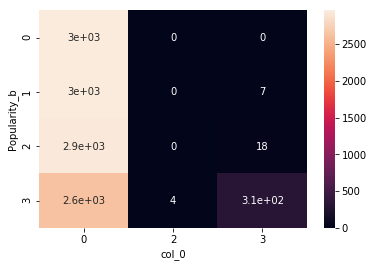

In [36]:
# Preparing model
y_true = modified_dataset["Popularity_b"]
y_pred =  logistic_model2.predict(inp)
# Calculating Precision
precision_values = precision_score(y_true=y_true, y_pred=y_pred, average=None)
# Calculating Recall
recall_values = recall_score(y_true=y_true, y_pred=y_pred, average=None)
# Calculating F1-score
f1_score_values = f1_score(y_true=y_true, y_pred=y_pred, average=None)

print("This is the model for 'Cummulative Ratings'\n\nPrecision:")
for i in range(0,len(precision_values)):
    print("The precision value for %s is: %f" % (names_true[i], precision_values[i]))

print("\nRecall:")
for i in range(0,len(recall_values)):
    print("The recall value for %s is: %f" % (names_true[i], recall_values[i]))
    
print("\nF1-Score: ")
for i in range(0,len(f1_score_values)):
    print("The F1-score for %s is: %f" % (names_true[i], f1_score_values[i]))
    
model1 = pd.crosstab(y_true, y_pred)
# Plot heatmap with seaborn library
sn.heatmap(model1, annot=True)

Woah, what? the model seems to be worse than before! What's going on?

These results show that maybe too much of the anime has been thought to be not popular, a phenomena which has been observed when we were using `Kmeans`. Most of the data were regrouped to `not popular` category. Applying a multiplication to the `members` columns didn't help with the predictions, if not made it worse!

However, it did solidify one thing: the model is better at calling out a `bad anime` compared to before, and it has also become more specific when saying an anime is good. A higher `precision` for saying good anime, and a higher `recall` for saying bad anime! However, this rendered the `F1-score` to be pointless as this model can only be used in extreme predictions.

In short, the model's properties were amplified instead of decreased! Could be good or bad depending on an anime producer's needs. 

If I were a producer, I would not produce an anime based on this model purely because it cannot gauge at what level the anime is in. However, if you were to produce a block buster series and want to see if an anime is classified as good or bad I'd say try this model out! Let's see an example:

In [37]:
# using either of the model is acceptable, since the  both share the same properties
prediction = logistic_model.predict(inp.head(1))
print('The title %s is predicted to be \'%s\''% (modified_dataset.iloc[0]['name'], names_true[prediction[0]]))

The title Kimi no Na wa. is predicted to be 'not popular'


Kimi no Na wa was an instant hit for its unique storyline and fantastic artwork, not so much of its genre. Indeed it goes back to not having enough variables being collected to produce good results. 

The only way, again, is to try other algorithms, or use more complex methods such as DL to solve it. If we were to implement a `Drop Out` function to ignore some characteristics, it may help to converge the model better.

## Conclusion for classification

In conclusion, I have explored `Precision`, `Recall`, and `F1-score`, and used those scores to explain when to consider each for each individual differnet cases. Furthermore, I have used `Unsupervised Learning` algorithm, `KMeans` to regroup the anime which are good and amplified the characteristics of the `Logistic Regression` model. More data is required to make accurate predictions and using a Deep Neural Network may be required.

# Conclusion:

All in all, I have reflected on why my Linear Regression model was not performing well, verified it through the use of other Regression metrics, and came up with the conclusion that the ratings of an anime cannot be predicted by just the genre of the anime, it requires more types of data and more complex algorithm due to the complexity of human behaviours. The classification model is also checked by using 3 different metrics: Precision, Recall, F1-score, to determine whether it is suitable in different use cases. Regrouping with Unsupervised learning enhanced the characteristics of the model, and a `Drop Out` node concept should be used to unlearn some of the data's characteristics.

# References
- Line on scatterplot: https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
- remove rows if it is less than required: https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
- `R^2` theory: https://corporatefinanceinstitute.com/resources/knowledge/other/r-squared/
- Creating legend in pyplot: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
- `OLS` more examples: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html
- evaluation metrics compilation: https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
- setting the size of the scatterplot: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
- underfitting and overfitting: https://www.kaggle.com/dansbecker/underfitting-and-overfitting
- multiple linear regression example: https://medium.com/@dhwajraj/python-regression-analysis-part-4-multiple-linear-regression-ed09a0c31c74
- some insights of MAE, MSE, RMSE etc: https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0
- statsmodels tools: https://www.statsmodels.org/dev/_modules/statsmodels/tools/eval_measures.html#meanabs
- K-means with scikitlearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Precision vs Recall selection ideas for selection: https://datascience.stackexchange.com/questions/30881/when-is-precision-more-important-over-recall
- Kimi no na wa (Your Name) Wikipedia: https://en.wikipedia.org/wiki/Your_Name